<a href="https://colab.research.google.com/github/SaniaK27/Tracker-expense/blob/main/Titanic_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('Titanic-Dataset.csv')

In [ ]:
data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Survival VS Sex

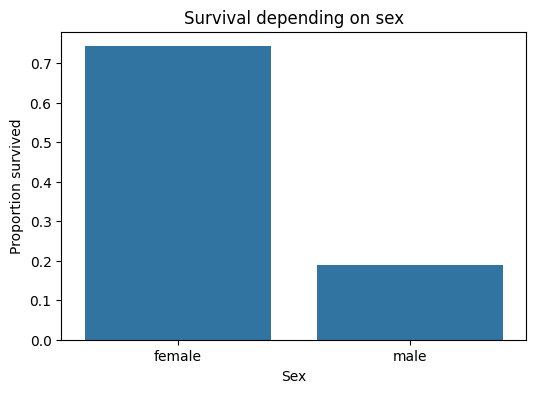

In [ ]:
df = data.groupby('Sex') ['Survived'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data = df, x = 'Sex', y = 'Survived')
plt.title("Survival depending on sex")
plt.ylabel("Proportion survived")
plt.show()

#Survival VS Pclass

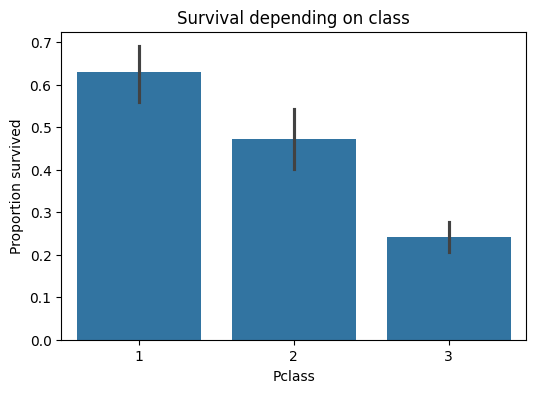

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data = data, x = 'Pclass', y = 'Survived')
plt.title("Survival depending on class")
plt.ylabel("Proportion survived")
plt.show()

#Survival VS Age

/tmp/ipython-input-958967499.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  agegroup_df = data.groupby('AgeGroup')['Survived'].mean().reset_index()


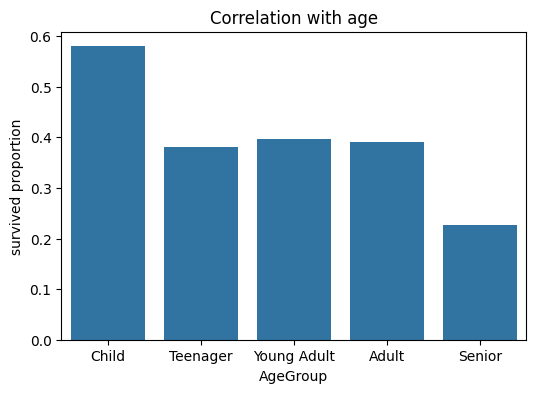

In [ ]:
bins = [0, 12, 20, 40, 60, 80]
labels = ['Child', 'Teenager', 'Young Adult',  'Adult', 'Senior']
data['AgeGroup'] = pd.cut(data['Age'], bins = bins, labels = labels)
agegroup_df = data.groupby('AgeGroup')['Survived'].mean().reset_index()
plt.figure(figsize=(6,4))
sns.barplot(data = agegroup_df, x = 'AgeGroup', y = 'Survived')
plt.title("Correlation with age")
plt.ylabel("survived proportion")
plt.show()

#Fare VS Survived

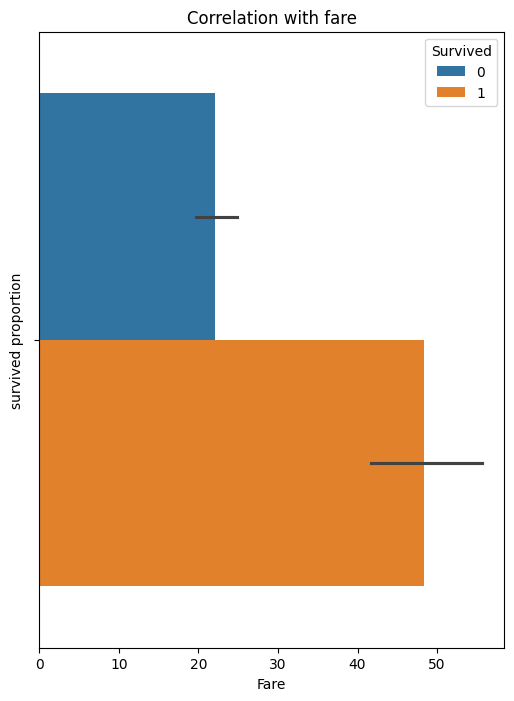

In [ ]:
plt.figure(figsize=(6,8))
sns.barplot(data = data, x = 'Fare', hue = 'Survived')
plt.title("Correlation with fare")
plt.ylabel("survived proportion")
plt.show()


In [ ]:
data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Embarked'] = data['Embarked'].fillna('S')

In [ ]:
data = data.drop(columns='Cabin', axis = 1)

In [ ]:
family_size = data['SibSp'] + data['Parch'] + 1
data['FamilySize'] = family_size

In [ ]:
data = data.drop(columns = 'PassengerId', axis = 1)

In [ ]:
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

In [ ]:
data['Sex'] = data['Sex'].map({'male':0, 'female':1})

In [ ]:
data['Embarked'] = data['Embarked'].map({'S':0, 'C':1, 'Q' : 2})


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data['Fare'] = sc.fit_transform(data[['Fare']])

In [ ]:
X = data.drop(columns = ['Survived', 'Name', 'Ticket', 'AgeGroup'])
y = data['Survived']

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,0,22.000000,1,0,-0.502445,0,2
1,1,1,38.000000,1,0,0.786845,1,2
2,3,1,26.000000,0,0,-0.488854,0,1
3,1,1,35.000000,1,0,0.420730,0,2
4,3,0,35.000000,0,0,-0.486337,0,1
...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,-0.386671,0,1
887,1,1,19.000000,0,0,-0.044381,0,1
888,3,1,29.699118,1,2,-0.176263,0,4
889,1,0,26.000000,0,0,-0.044381,1,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
log = LogisticRegression()
log.fit(X_train, y_train)
y_pred = log.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.7988826815642458
[[89 16]
 [20 54]]
